In [75]:
# for DataFrames
import os
import numpy as np
import pandas as pd
import geopandas as gdp
import geoplot

# for graphing
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import plotly.plotly as py
import cufflinks as cfg

# for stats + stat testing
import scipy as sp
from scipy import stats 

In [2]:
# read files needed
df_rosenberg = pd.read_csv("../data/01_clean_data/rosenberg_table.csv").drop("Unnamed: 0", axis=1)
df_hof = pd.read_csv("../data/01_clean_data/hofstede_report.csv").drop("Unnamed: 0", axis=1)

In [3]:
# setting sns and matloplib styles
sns.set_style("whitegrid")
sns.set_palette("coolwarm")
sns.set_context("notebook", font_scale=1,  rc={"lines.linewidth": 1.5})

## 1. Answering the initial question

### Check out distributions of answers per country of 5 random samples
Useful to find outliers/skewness is answers and overall understanding of distributions.

Necessary to see if we continue working with the sample mean or the median for our correlation analysis. 

In [4]:
lst = df_rosenberg.sample(7)["country"].to_list()
lst

['US', 'US', 'GB', 'US', 'NL', 'US', 'AT']

In [5]:
def distribution (lst_value):
    df_rosenberg_i = df_rosenberg.loc[df_rosenberg["country"] == i]["overall_score"] 
    return sns.distplot(df_rosenberg_i, bins=20, kde=False) 

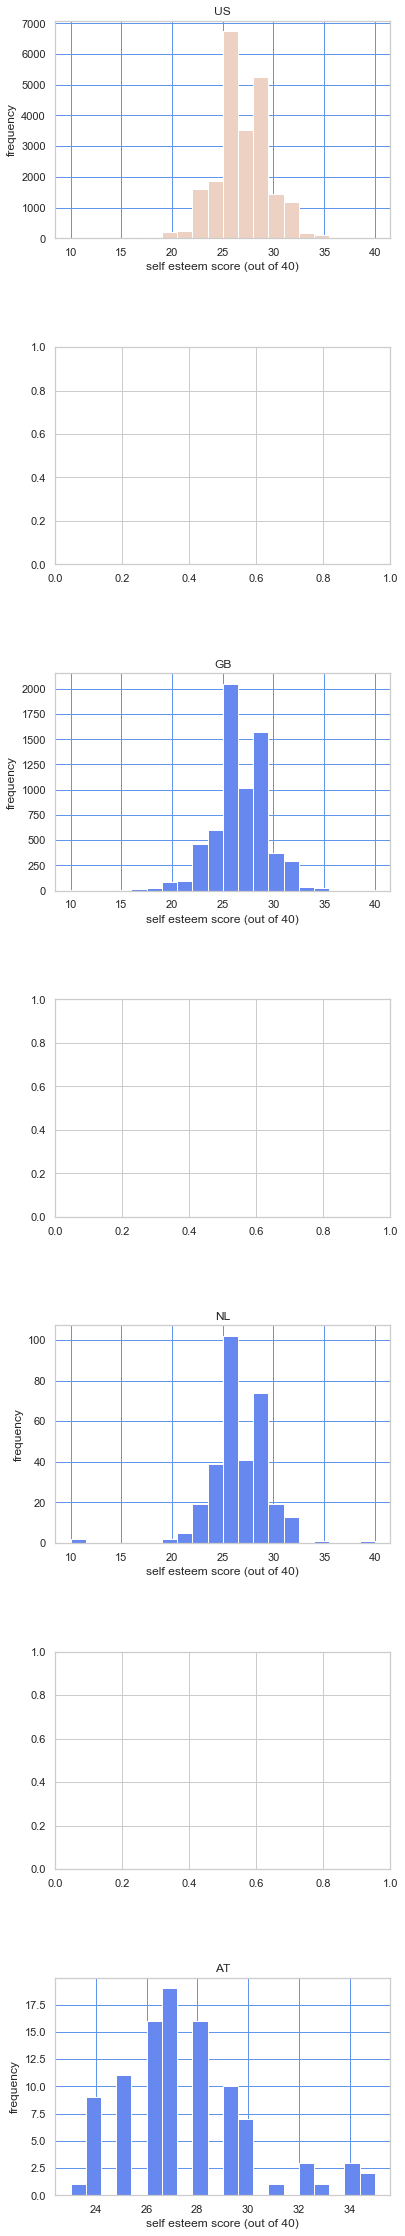

In [6]:
fig, axs = plt.subplots(7, figsize=(6,40))

for i in lst:
    df = df_rosenberg.loc[df_rosenberg["country"] == i]["overall_score"]
    axs[lst.index(i)].hist(df, bins=20)
    axs[lst.index(i)].set_title(i)
    axs[lst.index(i)].set_xlabel("self esteem score (out of 40)")
    axs[lst.index(i)].set_ylabel("frequency")
    axs[lst.index(i)].grid(axis="both", color='cornflowerblue')
    plt.subplots_adjust(hspace=0.5)



### Graphing out the mean by country

In [35]:
rosenberg_grouped = df_rosenberg.groupby(["country", "country_id"]).mean()
rosenberg_grouped.head()
df_hof.head()

,country,power_distance,individualism,country_id
0,Argentina,49.0,46.0,10
1,Australia,36.0,90.0,13
2,Austria,11.0,55.0,12
3,Bangladesh,80.0,20.0,19
4,Belgium,65.0,75.0,20


In [8]:
merge_df = rosenberg_grouped.merge(df_hof, how="left", on="country_id").dropna()
merge_df.head()

,country_id,age,overall_score,country,power_distance,individualism
2,10,23.862069,26.885057,Argentina,49.0,46.0
3,12,26.565657,27.505051,Austria,11.0,55.0
4,13,26.646316,26.718737,Australia,36.0,90.0
7,19,25.269231,26.807692,Bangladesh,80.0,20.0
8,20,26.098837,26.627907,Belgium,65.0,75.0


In [29]:
table = pd.read_csv("../data/01_clean_data/Ice-cream-time.csv").drop("Unnamed: 0", axis=1)

In [54]:
table = table.rename(columns={"Entity":"country"})
table.head()

,ADM0_A3,geometry,country
0,IDN,MULTIPOLYGON (((11108970.26020776 445285.13023...,Indonesia
1,IDN,MULTIPOLYGON (((11108970.26020776 445285.13023...,Indonesia
2,IDN,MULTIPOLYGON (((11108970.26020776 445285.13023...,Indonesia
3,MYS,MULTIPOLYGON (((11108970.26020776 445285.13023...,Malaysia
4,MYS,MULTIPOLYGON (((11108970.26020776 445285.13023...,Malaysia


In [60]:
df = table.merge(merge_df, how="left", left_on="country", right_on="country").drop(["age", "country_id"], axis=1)
df.head()

,ADM0_A3,geometry,country,slef esteem,power_distance,individualism
0,IDN,MULTIPOLYGON (((11108970.26020776 445285.13023...,Indonesia,27.153374,78.0,14.0
1,IDN,MULTIPOLYGON (((11108970.26020776 445285.13023...,Indonesia,27.153374,78.0,14.0
2,IDN,MULTIPOLYGON (((11108970.26020776 445285.13023...,Indonesia,27.153374,78.0,14.0
3,MYS,MULTIPOLYGON (((11108970.26020776 445285.13023...,Malaysia,27.642674,104.0,26.0
4,MYS,MULTIPOLYGON (((11108970.26020776 445285.13023...,Malaysia,27.642674,104.0,26.0


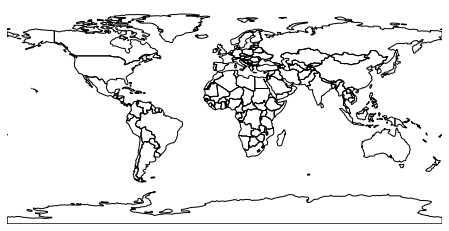

In [77]:
shapefile = os.path.expanduser("../../ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp")
colors = 9
cmap = "coolwarm"

world = geoplot.polyplot(world, figsize=(8,4))


In [76]:
geopandas = gdp.read_file(shapefile)[["ADM0_A3", "geometry"]].to_crs("+proj=robin")
geopandas.sample(5)

RuntimeError: b'no arguments in initialization list'

### Creating the correlation table

In [13]:
rosenberg_grouped.describe()

,age,overall_score
count,86.000000,86.000000
mean,25.583268,26.899690
std,2.537350,0.473611
min,18.156250,25.468750
25%,24.038589,26.617503
50%,25.547917,26.865261
75%,27.114754,27.188384
max,32.589831,28.421053


Text(0, 0.5, 'Distribution')

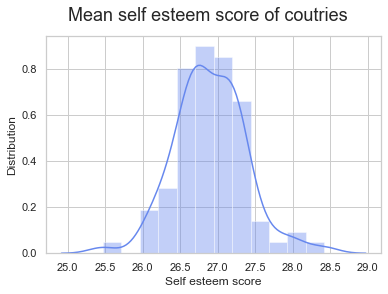

In [41]:
# initial distribution of all scores per country
figure_distribution = sns.distplot(rosenberg_grouped["overall_score"])
figure_distribution.figure.suptitle("Mean self esteem score of coutries", fontsize = 18)

plt.xlabel('Self esteem score', fontsize=12)
#plt.yticks(figure_distribution.get_yticks(), figure_distribution.get_yticks() * 100)
plt.ylabel('Distribution', fontsize=12)

### Correlation analysis

In [46]:
# merging of tables to complete correlation 
merge_df = rosenberg_grouped.merge(df_hof, how="left", on="country_id")
merge_df = merge_df.dropna()
merge_df = merge_df.rename(columns={"overall_score":"slef esteem"})
merge_df.head()

,country_id,age,slef esteem,country,power_distance,individualism
2,10,23.862069,26.885057,Argentina,49.0,46.0
3,12,26.565657,27.505051,Austria,11.0,55.0
4,13,26.646316,26.718737,Australia,36.0,90.0
7,19,25.269231,26.807692,Bangladesh,80.0,20.0
8,20,26.098837,26.627907,Belgium,65.0,75.0


In [49]:
# actual correlation table
correlations = merge_df.corr(method="pearson") 
correlations = correlations.drop(["country_id", "age"], axis=1)
correlations = correlations.drop(["country_id", "age"], axis=0)
correlations

,slef esteem,power_distance,individualism
slef esteem,1.000000,0.232530,-0.183653
power_distance,0.232530,1.000000,-0.570514
individualism,-0.183653,-0.570514,1.000000


(array([0.5, 1.5, 2.5]), <a list of 3 Text yticklabel objects>)

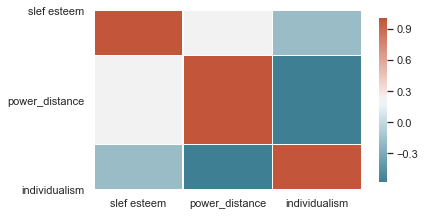

In [50]:
# correlation of overall score to cultural indicators
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(6, 6))

cmap = sns.diverging_palette(220, 20, as_cmap=True)

sns.heatmap(correlations, cmap=cmap, square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.yticks(rotation=360)


### Measuring significance in difference

#### H0 and H1 testing for random samples

In [ ]:
lst = merge_df.sort_values("overall_score", ascending=True)
low = lst.head(2)["country_id"].to_list()
high = lst.tail(2)["country_id"].to_list()
print(low, high)

In [ ]:
# test 1 
lst = [123, 48]
fig, axs = plt.subplots(7, figsize=(6,40))

for i in lst:
    df = df_rosenberg.loc[df_rosenberg["country"] == i]["overall_score"]
    axs[lst.index(i)].hist(df, bins=20)
    axs[lst.index(i)].set_title(i)
    axs[lst.index(i)].set_xlabel("self esteem score (out of 40)")
    axs[lst.index(i)].set_ylabel("frequency")
    axs[lst.index(i)].grid(axis="both", color='cornflowerblue')
    plt.subplots_adjust(hspace=0.5)
"""sample_1 = 
sample_2 = """

In [ ]:
# repeting the test to avoid errors
sample_1 = 
sample_2 = 

In [ ]:
# repeting the test to avoid errors

In [ ]:
#sns.distplot()

## Bonus

##### 2.1 Does gender have an influence?

In [ ]:
# we select only F, M and O for this, as 0s indicate people who chose not to tell
gender_score = pd.crosstab(df_rosenberg["overall_score"], df_rosenberg["gender"])
gender_score = gender_score.drop("0", axis=1)
gender_score.head(20)
gender_score = gender_score[["F"]]
F = gender_score

In [ ]:
# graph all three distibutions or three line graphs?
""""F = 
M = 
O = 
"""

##### 2.2 Does age have an influence?

In [78]:
# grouping byage + avg gives me a frequency 
rosenberg_grouped_age = df_rosenberg.groupby("age").mean()[["overall_score"]]
#rosenberg_grouped_age = rosenberg_grouped_age.drop("country", axis=1)
rosenberg_grouped_age = rosenberg_grouped_age[10:]

bins = np.linspace(df_rosenberg.age.min(), df_rosenberg.age.max(), 10)
grouped = df_rosenberg.groupby(pd.cut(df_rosenberg.age, bins))
grouped

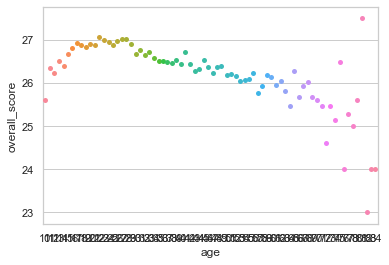

In [79]:
x = rosenberg_grouped_age.index
y = rosenberg_grouped_age["overall_score"]

#plt.scatter(x, y, color="pink", linewidth = .05)
#sns.boxplot(data=data)

sns.stripplot(x=x, y=y)

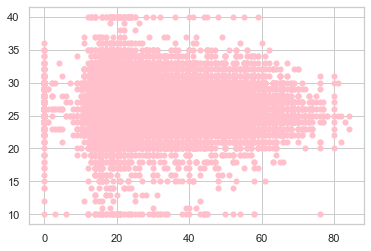

In [80]:
x = df_rosenberg["age"]
y = df_rosenberg["overall_score"]

plt.scatter(x, y, color="pink", linewidth = .05)

### Is  the difference significant?
#### H0 and H1 testing